In [4]:
library(repr)

In [70]:
options( repr.plot.width = 5, repr.plot.height = 5 )

# Modeling

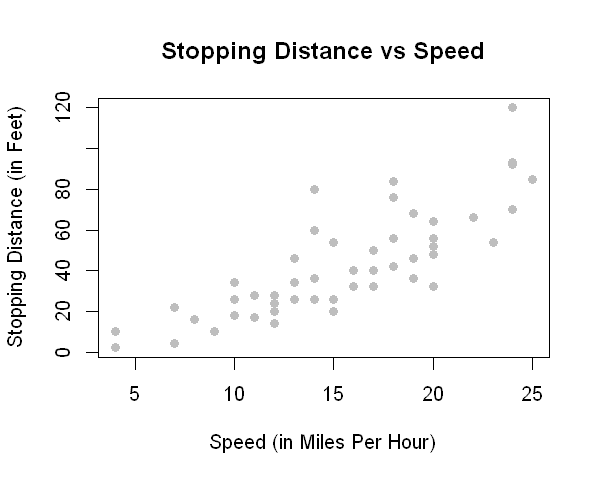

In [42]:
plot(
    dist ~ speed,
    data= cars,
    xlab = 'Speed (in Miles Per Hour)',
    ylab = 'Stopping Distance (in Feet)',
    main = 'Stopping Distance vs Speed',
    pch = 20,
    cex = 1.5,
    col = 'grey'
)

The relationship between $X$ an $Y$ can use the form:

$$Y = f(X) + \epsilon$$

But a more concise way to write this is to add in parameters $\beta$ to account for the slope of $X$ in relation to $Y$:

$$Y = \beta_0 + \beta_1 X + \epsilon$$

where 

$$\epsilon \sim N(0, \sigma^2)$$

# Simple Linear Regression

The model above has three variables that need to be estimated: $\beta_0, \beta_2, \sigma^2$. We can think of each $Y_i$ having a different distribution for each $X_i$. While $X_i$ can be a fixed constant based on the observed value for that observation, $Y_i$ is variable because of the randomness of the $\epsilon$. With this notion, we can think of each $Y_i$ as having a different distribution for each $X$, i.e. $Y_i$ has a conditonal distribution dependent on the value of $X$ written as $x_i$. So think of a linear function plotted on an (x, y) cartesian map, and at each $x_i$ the result of $y_i$ can be seen as normally distributed $y_i \sim N(0, \sigma^2)$. Or a better way to think of this is:

$$Y_i | X_i \sim N(\beta_0 + \beta_1 x_i, \sigma^2)$$

and the mean can be written as:

$$E[Y_i |X_i = x_i] = \beta_0 + \beta_1 x_i$$

but the variance remains constant for each $x_i$:

$$Var[Y_i | X_i = x_i] = \sigma^2$$

A linear model can be described using LINE:
- Linear
- Independent / errors are independent
- Normal / errors are normally distributed
- Equal Variance / variance for $Y$ at each value of $x$ has the same $\sigma^2$

How to measure the line best fit to the data through Least Squares:

$$argmin_{\beta_0, \beta_1}\ \sum_{i = 1}^n\ (y_i - (\beta_0 + \beta_1 x_i))^2$$

In order to find the values of $\beta$ that minimizes this function we take the partial derivative of each $\beta$:
- $\frac{\partial f}{\partial \beta_0} = -2 \sum_{i = 1}^n (y_i - \beta_0 - \beta_1 x_i) = 0$
- $\frac{\partial f}{\partial \beta_1} = -2 \sum_{i = 1}^n (x_i)(y_i - \beta_0 - \beta_1x_i) = 0$

Then solve the system of equations:
- $\hat \beta_1 = \frac{\sum_{xy}}{\sum_{xx}}$
- $\hat \beta_0 = \bar y - \hat \beta_1 \bar x$

where:

$$\frac{\sum_{xy}}{\sum_{xx}} = \frac{\sum_{i = 1}^n x_i y_i - \frac{(\sum_{i = 1}^n x_i)(\sum_{i = 1}^n y_i)}{n}}{\sum_{i = 1}^n x_i^2\ - \frac{(\sum_{i = 1}^n\ x_i)^2}{n}}$$

and to simplify these summations:

$$\sum_{xy} = \sum_{i = 1}^n (x_i - \bar x)(y_i - \bar y)$$
$$\sum_{xx} = \sum_{i = 1}^n (x_i - x)^2$$
$$\sum_{yy} = \sum_{i = 1}^n (y_i - \bar y)^2$$

so then to simplify the equation for $\hat \beta_1$:

$$\frac{\sum_{xy} = \sum_{i = 1}^n (x_i - \bar x)(y_i - \bar y)}{\sum_{i = 1}^n (x_i - x)^2}$$

In [17]:
x <- cars$speed
y <- cars$dist

Sxy <- sum( (x - mean(x)) * (y - mean(y)) )
Sxx <- sum( (x - mean(x)) ^ 2 )
Syy <- sum( (y - mean(y)) ^ 2 )

c(Sxy, Sxx, Syy)

[1]  5387.40  1370.00 32538.98

In [18]:
beta_1_hat <- Sxy / Sxx
beta_0_hat <- mean(y) - beta_1_hat * mean(x)

c(beta_0_hat, beta_1_hat)

[1] -17.579095   3.932409

#### Interpretation of Regression Coefficients

Slope parameter $\beta_1$ tells us that for an increase in speed of one mile per hour (one unit of $x$), the mean stopping distance $y$ increases by $\beta_1$. So $\beta_1$ tells us how the mean of $Y$ is affected by a change in $x$. So the estimate for $\beta_1 = 3.93$ above tells us that for an increase in speed by 1 mile per hour, the estimated mean stopping distance increases by $3.93$ feet.

The intercept parameter $\beta_0$ tells ud the mean stopping distance for a car traveling 0 miles an hour. The estimated $\beta_0 = -17.58$ tells us the estimated mean stopping distance for a car traveling 0 miles an hour is $-17.58$ feet. Obviously Extrapolation is the reason for a nonsensical negative value.

# Making Predictions

With the above calculations, the estimated line is:

$$\hat y = -17.58 + 3.93x$$

Now just add in the $x$ value to get an estimated value for $\hat y$.

In [19]:
x     <- 8
hat_y <- beta_0_hat + beta_1_hat * x
hat_y

[1] 13.88018

This tells us that the mean stopping distance for a car traveling $8$ miles per hour is $13.88$ feet. Let's make an interpolation for 21. Not an observed value for $y$, but does fall in the range of the dataset:

In [21]:
x     <- 21
hat_y <- beta_0_hat + beta_1_hat * x
hat_y

[1] 65.00149

Extrapolation for a car traveling 50 miles per hour is dangerous as it falls outside the range of our data:

In [22]:
x     <- 50
hat_y <- beta_0_hat + beta_1_hat * x
hat_y

[1] 179.0413

# Residuals

Residual can be seen as the error term $\epsilon$:

$$\epsilon_i = y_i - \hat y_i$$

In [23]:
which( cars$speed == 8 )

[1] 5

In [24]:
cars[5, ]

,speed,dist
5,8,16


In [25]:
e = cars[5, ]$dist - 13.88
e

[1] 2.12

This means the predicted value is actually $2.12$ feet more than what was predicted.

# Variance

We were able to get the unknown parameters $\beta_0, \beta_1$, now we can solve for the unknown parameter $\sigma^2$, which we will define as $s_e^2$:

$$s_e^2 = \frac{1}{n - 2}\ \sum_{i = 1}^n (y_i - (\hat \beta_0 + \hat \beta_1 x_i))^2 = \frac{1}{n - 2} \sum_{i = 1}^n \epsilon_i^2$$

Each $y_i$ will have a different estimate of the mean as each $Y_i$ will have a different value for each $x_i$

In [28]:
x     <- cars$speed
y_hat <- beta_0_hat + beta_1_hat * x
e     <- y - y_hat
n     <- length( e )
s2_e  <- sum( e ^ 2 ) / ( n - 2 )
s2_e

[1] 236.5317

By taking the square root of this value we compute the standard deviation of the residuals (residual standard error)

In [29]:
s_e <- sqrt( s2_e )
s_e

[1] 15.37959

This tells us that our estimate of mean stopping distance are 'typically' off by 15.38 feet.

# Decomposition of Variance

We can redefine the deviation of $y$ in the following way:

$$y_i - \bar y_i = (y_i - \hat y_i) + (\hat y_i = \bar y)$$

which is a smart way to add 0. This measures the deviation of an observation from the fitted regression line and $\hat y_i - \bar y$ measures the deviation of the fitted regression line from the sampe mean.

##### Sum of Square Total
$$SST = \sum_{i = 1}^n (y_i - \bar y)^2$$

and is the total variation of the observed $y$ values

##### Sum of Squares Regression
$$SSReg = \sum_{i = 1}^n (\hat y_i - \bar y)^2$$

is the explained variation of the observed $y$ values

##### Sum of Squares Error
$$SSE = RSS = \sum_{i = 1}^n (y_i - \hat y_i)^2$$

and this represents the unexlained variation of the observed $y$ values. 

In [33]:
SST   <- sum( (y - mean(y)) ^ 2 )
SSReg <- sum( (y_hat - mean(y)) ^ 2 )
SSE   <- sum( (y - y_hat) ^ 2 )

c( SST = SST, SSReg = SSReg, SSE = SSE )

SST    SSReg      SSE 
32538.98 21185.46 11353.52

# Coefficient of Determination

This is $R^2$:

$$R^2 = \frac{SSReg}{SST}$$

or 

$$1 - \frac{SSE}{SST}$$

and this is interpreted as the proportion of the observed variation in $y$ that can be explained by the simple linear regression model.

In [34]:
R2 <- SSReg / SST
R2

[1] 0.6510794

We can say $65\%$ of the observed variability in stopping distance is explained by the linear relationship with speed.

# Linear Model Function

In [36]:
stop_dist_model <- lm( dist ~ speed, data = cars )
stop_dist_model


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  


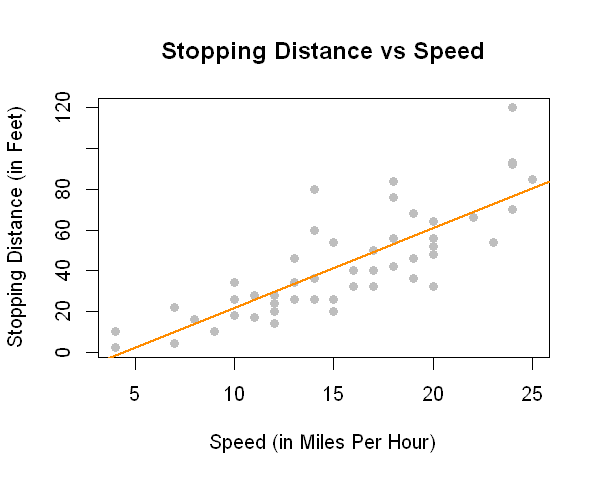

In [43]:
plot(
    dist ~ speed,
    data= cars,
    xlab = 'Speed (in Miles Per Hour)',
    ylab = 'Stopping Distance (in Feet)',
    main = 'Stopping Distance vs Speed',
    pch = 20,
    cex = 1.5,
    col = 'grey'
)
abline( stop_dist_model, lwd = 2, col = 'darkorange' )

In [44]:
names( stop_dist_model )

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [51]:
# stop_dist_model$residuals

In [48]:
coef( stop_dist_model )

(Intercept)       speed 
 -17.579095    3.932409

In [50]:
# resid( stop_dist_model )

In [53]:
# fitted( stop_dist_model )

In [54]:
summary( stop_dist_model )


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


In [55]:
names( summary( stop_dist_model ) )

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

In [56]:
summary( stop_dist_model )$r.squared

[1] 0.6510794

In [57]:
# S_e
summary( stop_dist_model )$sigma

[1] 15.37959

In [59]:
predict( stop_dist_model, newdata = data.frame( speed = c(8, 21, 50) ) )

1         2         3 
 13.88018  65.00149 179.04134

# Maximum Likelihood Estimation (MLE) Approach

The PDF of a random variable $X \sim N(\mu, \sigma^2)$ is given by:

$$f_x(x; \mu, \sigma^2) = \frac{1}{\sqrt(2 \pi \sigma^2)} exp[-\frac{1}{2}(\frac{x - \mu}{\sigma})^2]$$

so the PDF for each $Y_i$ value can be written as:

$$f_{Y_i}(y_i; x_i, \beta_0, \beta_1, \sigma^2) = \frac{1}{\sqrt(2 \pi \sigma^2)} exp[-\frac{1}{2}(\frac{y_i - (\beta_0 + \beta_1 x_i)}{\sigma})^2]$$

Given the $n$ data points $(x_i, y_i)$ we can write the likelihood, which is a function of the three parameters $\beta_0, \beta_1, \sigma^2$. Since the data has been observed we use $y_i$ to denote these values are no longer random:

$$L(\beta_0, \beta_1, \sigma^2) = \prod_{i = 1}^n \frac{1}{\sqrt(2 \pi \sigma^2)} exp[-\frac{1}{2}(\frac{y_i - \beta_0 - \beta_1 x_i}{\sigma})^2]$$

and the goal is to find the values for $\beta_0, \beta_1, \sigma^2$ to maximize this function. We can do a rearranging to simplify the above equation:

$$L(\beta_0, \beta_1, \sigma^2) = (\frac{1}{\sqrt(2 \pi \sigma^2)})^n exp[-\frac{1}{2 \sigma^2} \sum_{i = 1}^n (y_i - \beta_0 - \beta_1 x_i)^2]$$

Then we can take the natural logarithm of the likelihood function since the log is a monotonically increasing function.

$$log $L(\beta_0, \beta_1, \sigma^2) = -\frac{n}{2} log(2 \pi) - \frac{n}{2} log(\sigma^2) - \frac{1}{2 \sigma^2} \sum_{i = 1}^n (y_i - \beta_0 - \beta_1 x_i)^2$$

Then take the partial derivative with respect to each of the parameters, then set each to 0 to solve. The $\beta$ parameters will end up being the same derivation as Least Sqaures, but the value for $\sigma^2$ will be different as:

$$\hat \sigma^2 = \frac{1}{n} \sum_{i = 1}^n (y_i - \hat y_i)^2 = \frac{1}{n} \sum_{i = 1}^n e_i^2$$

# Simulation

In simulation you decide the true model and and simulate data from it in an attempt to recover information about the unknown true model. We will simulate $n = 21$ using a $\mu = 5$and $\beta_1 = 2$ adn we will let $\epsilon \sim N(\mu = 0, \sigma^2 = 9)$

In [63]:
num_obs <- 21
beta_0  <- 5
beta_1  <- -2
sigma   <- 3

set.seed( 19920917 )

epsilon <- rnorm( n = num_obs, mean = 0, sd = sigma )
x_vals  <- seq( from = 0, to = 10, length.out = num_obs )
y_vals  <- beta_0 + beta_1 * x_vals + epsilon

sim_fit <- lm( y_vals ~ x_vals )
coef( sim_fit )

(Intercept)      x_vals 
   4.098106   -1.842026

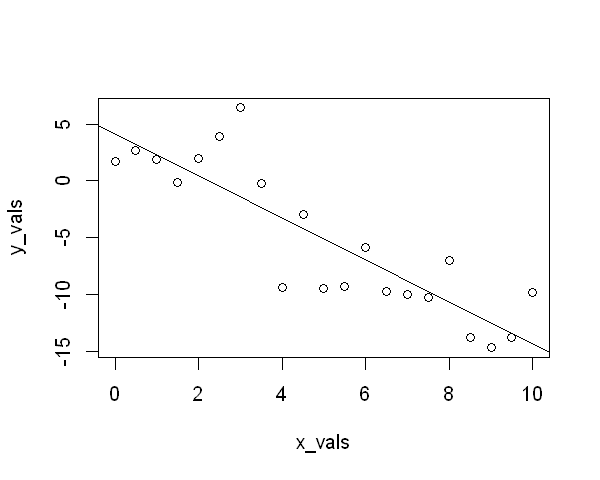

In [64]:
plot( y_vals ~ x_vals )
abline( sim_fit )

It is better to write a function and store data in a dataframe, so a bett approach is:

In [65]:
sim_slr <- function( x, beta_0 = 10, beta_1 = 5, sigma = 1 ) {
    n       <- length(x)
    epsilon <- rnorm( n, mean = 0, sd = sigma )
    y       <- beta_0 + beta_1 * x + epsilon
    data.frame( predictor = x, response = y )
}

In [66]:
set.seed( 19920917 )

sim_data <- sim_slr( x = x_vals, beta_0 = 5, beta_1 = -2, sigma = 3 )
head( sim_data )

predictor,response
0.0,1.71313550
0.5,2.66863733
1.0,1.91157192
1.5,-0.09131574
2.0,2.00290038
2.5,3.94291844


In [67]:
sim_fit <- lm( response ~ predictor, data = sim_data )
coef( sim_fit )

(Intercept)   predictor 
   4.098106   -1.842026

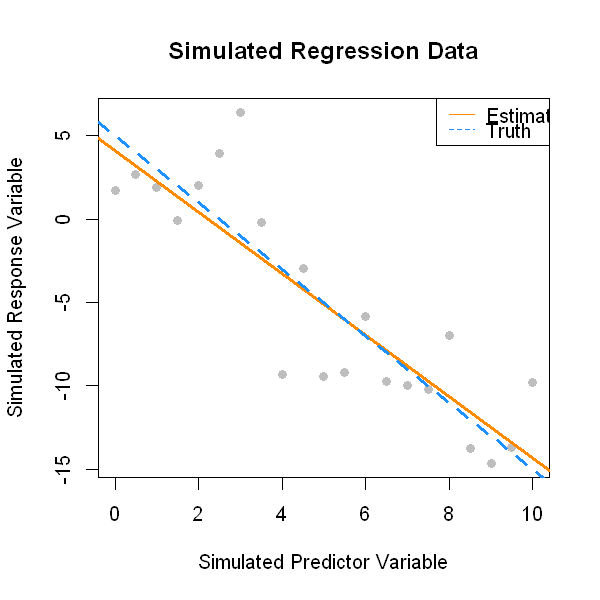

In [71]:
plot( 
    response ~ predictor,
    data = sim_data,
    xlab = 'Simulated Predictor Variable',
    ylab = 'Simulated Response Variable',
    main = 'Simulated Regression Data',
    pch  = 20,
    cex  = 1.5,
    col  = 'grey'
)

abline( sim_fit, lwd = 3, lty = 1, col = 'darkorange' )
abline( beta_0, beta_1, lwd = 3, lty = 2, col = 'dodgerblue' )

legend( 
    'topright', 
    c( 'Estimate', 'Truth' ),
    lty = c( 1, 2 ),
    lwd = 1,
    col = c( 'darkorange', 'dodgerblue' )
)